In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [3]:
%matplotlib inline
import numpy as np

In [ ]:
plt.subplot(2,1,1)
x=np.linspace(0.10,10)
I=np.sin(x)*np.cos(x[:,np.newaxis])
plt.imshow(I)
plt.colorbar();
plt.subplot(2,1,2)
I=np.sin(x)*np.cos(x[:,np.newaxis])
plt.imshow(I,cmap='gray')#cmap參數可以用來指定顏色表達
plt.colorbar();

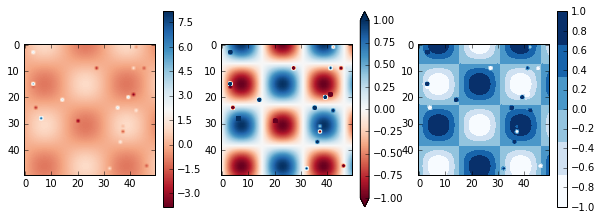

In [5]:
#製造一個影像雜訊
speckles=(np.random.random(I.shape)<0.01)
I[speckles]=np.random.normal(0,3,np.count_nonzero(speckles))

plt.figure(figsize=(10,3.5))
#(預設色彩限制)反應了雜訊點(較大的值),但雜訊點把感興趣的清掉了
plt.subplot(1,3,1)
plt.imshow(I,cmap='RdBu')
plt.colorbar();
#手動設定顏色限制,外加上超出上下限值也給予顏色
plt.subplot(1,3,2)
plt.imshow(I,cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1,1);
#離散的色彩條
plt.subplot(1,3,3)
plt.imshow(I,cmap=plt.cm.get_cmap('Blues',6))
plt.colorbar()
plt.clim(-1,1);

In [ ]:
#範例:手寫數字
#載入0到5的數字影像,然後顯示一些出來
from sklearn.datasets import load_digits
digits=load_digits(n_class=6)
#每個數字都以64個像素的色調來定義
fig,ax=plt.subplots(8,8,figsize=(6,6))
for i,axi in enumerate(ax.flat):
  axi.imshow(digits.images[i],cmap='binary')
  axi.set(xticks=[],yticks=[])

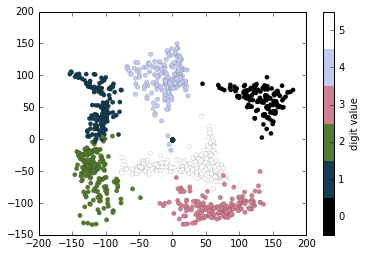

In [7]:
#使用IsoMap去把這些數字元投影到二維空間
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
projection=iso.fit_transform(digits.data)
#繪出結果
plt.scatter(projection[:,0],projection[:,1],lw=0.1,
      c=digits.target,cmap=plt.cm.get_cmap('cubehelix',6))
plt.colorbar(ticks=range(6),label='digit value')
plt.clim(-0.5,5.5);